In [2]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
#from pandas_datareader import data, wb
from datetime import datetime
%matplotlib inline
import seaborn as sns

In [4]:
'''start = datetime(2013, 1, 1)
end = datetime(2016, 1, 1)
print(start, end)'''

2013-01-01 00:00:00 2016-01-01 00:00:00


In [1]:
'''BAC = web.DataReader('BAC', 'iex', start, end)
C = web.DataReader('C', 'iex', start, end)
GS = web.DataReader('GS', 'iex', start, end)
JPM = web.DataReader('JPM', 'iex', start, end)
MS = web.DataReader('MS', 'iex', start, end)
WFC = web.DataReader('WFC', 'iex', start, end)'''

"BAC = web.DataReader('BAC', 'iex', start, end)\nC = web.DataReader('C', 'iex', start, end)\nGS = web.DataReader('GS', 'iex', start, end)\nJPM = web.DataReader('JPM', 'iex', start, end)\nMS = web.DataReader('MS', 'iex', start, end)\nWFC = web.DataReader('WFC', 'iex', start, end)"

In [3]:
df = pd.read_pickle('all_banks')

In [4]:
df.head(5)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [6]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [9]:
'''
Use pd.concat to concatenate the bank dataframes together to a single data frame
called bank_stocks. 
Set the keys argument equal to the tickers list.
Also pay attention to what axis you concatenate on.


'''

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   

Bank Ticker             ...        MS                                 WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume  Open   
Date                    ...                                                 
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.6   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.8   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.5   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  

[3 rows x 30 columns]

In [7]:
#What is the max Close price for each bank's stock throughout the time period?
#df['BAC']['Close'].max()
#for tick in tickers:
    #print(tick, df[tick]['Close'].max())
    
#df.xs(key = 'Close', axis = 1, level = 'Stock Info').max()
df.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

'''
XS:
The xs method takes in the column on which we want to perform an operation as key.
Axis tell whether it’s a row or column
Level is like use this layer in this dataframe.

'''

'\nXS:\nThe xs method takes in the column on which we want to perform an operation as key.\nAxis tell whether it’s a row or column\nLevel is like use this layer in this dataframe.\n\n'

In [8]:
#Create a new empty DataFrame called returns. 
#This dataframe will contain the returns for each bank's stock.

returns = pd.DataFrame()
returns

""


In [9]:
'''
We can use pandas pct_change() method on the Close column to create a column
representing this return value.
Create a for loop that goes and for each Bank Stock Ticker 
creates this returns column and set's it as a column in the returns DataFrame.
'''
for tick in tickers:
    returns[tick + 'Returns'] = df[tick]['Close'].pct_change()

returns.head()

,BACReturns,CReturns,GSReturns,JPMReturns,MSReturns,WFCReturns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [18]:
#Create a pairplot using seaborn of the returns dataframe.
#What stock stands out to you? Can you figure out why?

sns.pairplot(returns[1:])

'''
using [1:] along with a dataframe excludes the very first row as its NaNs
'''

In [10]:
'''
Using this returns DataFrame,
figure out on what dates each bank stock had the best and worst single day returns.
You should notice that 4 of the banks share the same day for the worst drop,
did anything significant happen that day?
'''

#for tick in tickers:
    #print(tick, df[tick]['Close'].max())
    
#for tick in tickers:
#    print(tick +" Return "+ df[tick]).max()
            
#df.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

#for tick in tickers:
#    print(returns[tick].idxmin())

#returns['BACReturns'].idxmin()
#returns['JPMReturns'].idxmax()

returns.idxmin()

BACReturns   2009-01-20
CReturns     2011-05-06
GSReturns    2009-01-20
JPMReturns   2009-01-20
MSReturns    2008-10-09
WFCReturns   2009-01-20
dtype: datetime64[ns]

In [12]:
returns.idxmax()

BACReturns   2009-04-09
CReturns     2011-05-09
GSReturns    2008-11-24
JPMReturns   2009-01-21
MSReturns    2008-10-13
WFCReturns   2008-07-16
dtype: datetime64[ns]

In [47]:
'''
Take a look at the standard deviation of the returns,
which stock would you classify as the riskiest over the entire time period?
Which would you classify as the riskiest for the year 2015?
'''

returns.std()

BACReturns    0.036650
CReturns      0.179969
GSReturns     0.025346
JPMReturns    0.027656
MSReturns     0.037820
WFCReturns    0.030233
dtype: float64

In [13]:
#For 2015 alone
returns.ix['2015-01-01':'2015-12-31'].std()

C:\Users\Venkat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


BACReturns    0.016163
CReturns      0.015289
GSReturns     0.014046
JPMReturns    0.014017
MSReturns     0.016249
WFCReturns    0.012591
dtype: float64

C:\Users\Venkat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Venkat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


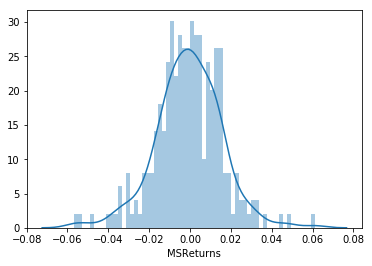

In [59]:
#Create a distplot using seaborn of the 2015 returns for Morgan Stanley 
#df.xs(key = 'Close', axis = 1, level = 'Stock Info').max()
#sns.distplot(returns['MSReturns'][1:])
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MSReturns'], bins = 60, )

'''
No major deviations; stocks have been very stable
'''

C:\Users\Venkat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Venkat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


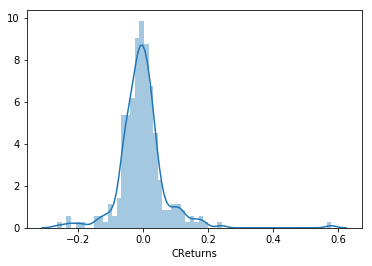

In [61]:
#Create a distplot using seaborn of the 2008 returns for CitiGroup
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['CReturns'], bins = 60)

#10 times more deviation than MS in 2015
#MS was 0.06
#whereas Citi is 0.6

In [14]:
#More Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [68]:
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


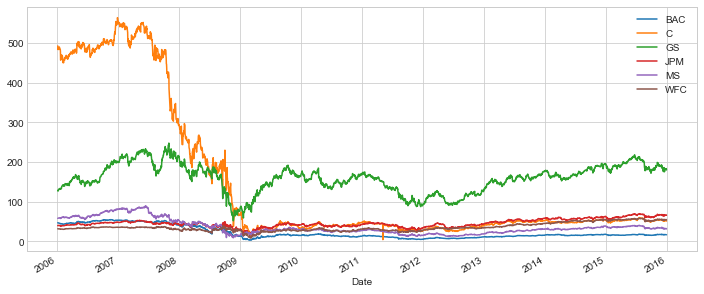

In [18]:
'''
** Create a line plot showing Close price for each bank
for the entire index of time.
(Hint: Try using a for loop, or use [.xs]
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html)
to get a cross section of the data.)**
'''
for tick in tickers:
    df[tick]['Close'].plot(label = tick, figsize = (12, 5))
plt.legend()

'''
Even GS stocks dip, but they recovered quickly
'''

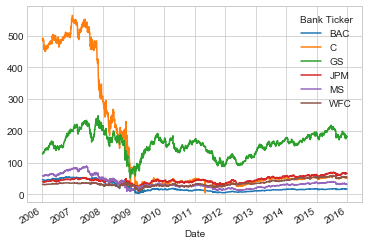

In [83]:
#Repeating the above with XS
df.xs(key = 'Close', axis = 1, level = 'Stock Info').plot()

C:\Users\Venkat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\Venkat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


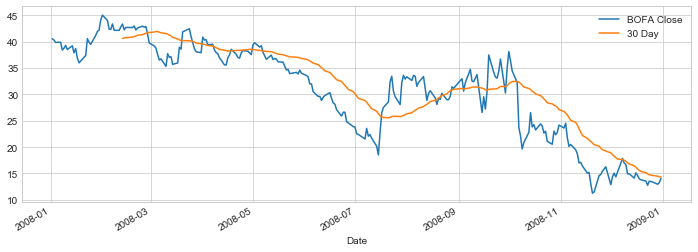

In [27]:
#Moving Averages
#Plot the rolling 30 day average against the Close Price for Bank Of America's
#stock for the year 2008

#df.xs(key = 'BAC', axis = 1, level = 'Bank Ticker')['Close'].plot()
plt.figure(figsize= (12, 4))
df['BAC'].ix['01-01-2008':'01-01-2009']['Close'].plot(label = 'BOFA Close')
df['BAC'].ix['01-01-2008':'01-01-2009']['Close'].rolling(window = 30).mean().plot(label = '30 Day')
plt.legend()

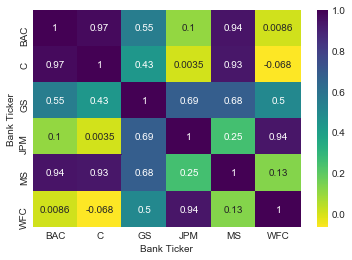

In [36]:
#Create a heatmap of the correlation between the stocks Close Price.
#sns.heatmap(df['Close'])
sns.heatmap(df.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), cmap = 'viridis_r', annot = True)

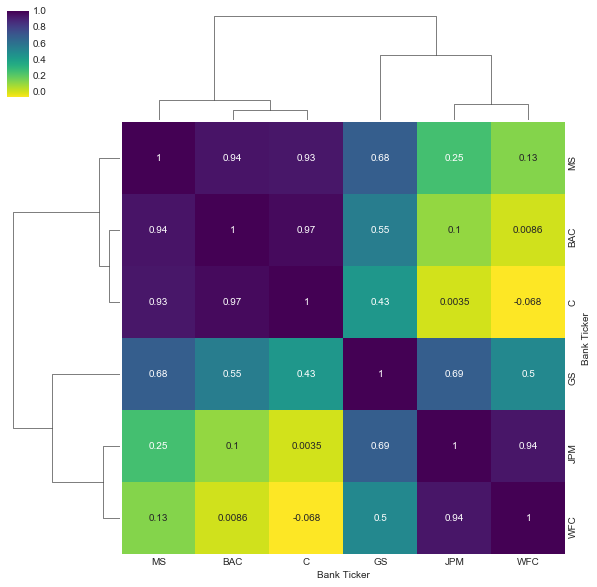

In [37]:
#Optional: Use seaborn's clustermap to cluster the correlations together:
sns.clustermap(df.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), cmap = 'viridis_r', annot = True)
'''
High co-relation among JPM Chase and Wells Fargo
and as well as between
BOFA and MS
'''


In [7]:
PART 3 PLOTLY AND CUFFLINKS:

Wil be done in Spyder.
But lets try it here!:P

SyntaxError: invalid syntax (<ipython-input-7-81baf57192f8>, line 1)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotly import __version__

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [47]:
#Use .iplot(kind='candle) to create a 
#candle plot of Bank of America's stock 
#from Jan 1st 2015 to Jan 1st 2016.

BAC_15 = df['BAC'].loc['01-01-2015':'01-01-2016'][['Open', 'High', 'Low', 'Close', ]]
BAC_15.iplot(kind = 'box', colorscale = 'rdylbu')

In [48]:


#Moving Averages
#Plot the rolling 30 day average against the Close Price for Bank Of America's
#stock for the year 2008

#df.xs(key = 'BAC', axis = 1, level = 'Bank Ticker')['Close'].plot()
plt.figure(figsize= (12, 4))
df['BAC'].ix['01-01-2008':'01-01-2009']['Close'].plot(label = 'BOFA Close')
df['BAC'].ix['01-01-2008':'01-01-2009']['Close'].rolling(window = 30).mean().plot(label = '30 Day')
plt.legend()

In [60]:
#Use .ta_plot(study='sma') 
#to create a Simple Moving Averages plot
#of Morgan Stanley for the year 2015.

df['MS']['Close'].ix['01-01-2015':'01-01-2016'].ta_plot(study = 'sma', periods = [13, 21, 55])

C:\Users\Venkat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [69]:
#Use .ta_plot(study='boll') to 
#create a Bollinger Band Plot 
#for Bank of America for the year 2015.

#df['BAC'].loc['01-01-2015':'01-01-2016'].ta_plot(study = 'boll')
#df['BAC'].ix['01-01-2015':'01-01-2016'].ta_plot(study = 'boll', periods = [13, 21, 55])
df['BAC']['Close'].ix['01-01-2015':'01-01-2016'].ta_plot(study = 'boll')

C:\Users\Venkat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

